In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import holidays

In [2]:
# automatic datetime conversion
dfPM10 = pd.read_csv('data/1h/PM10.csv', index_col=0, parse_dates=True)
dfPM25 = pd.read_csv('data/1h/PM2.5.csv', index_col=0, parse_dates=True)
dfs = {'PM10': dfPM10, 'PM25': dfPM25}

In [3]:
dfPM10.index = pd.to_datetime(dfPM10.index, format='mixed')
dfPM25.index = pd.to_datetime(dfPM25.index, format='mixed')

In [4]:
for df in dfs.values():
    display(df)

,MpKrakAlKras,MpKrakDietla,MpKrakWadow,MpKrakBulwar,MpKrakSwoszo,MpKrakPrad,MpKrakTelime,MpKrakBujaka,MpKrakZloRog,MpKrakOsPias
data,,,,,,,,,,
2004-01-01 01:00:00,44.0,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 02:00:00,61.0,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 03:00:00,35.0,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 04:00:00,39.0,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 05:00:00,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,NaN,31.4861,22.9874,NaN,34.2248,NaN,NaN,NaN,32.3285,24.1855
2023-12-31 21:00:00,NaN,39.8371,28.0558,NaN,22.5504,NaN,NaN,NaN,38.2589,37.9393
2023-12-31 22:00:00,NaN,42.2331,30.9363,NaN,30.0140,NaN,NaN,NaN,41.0132,31.8240


,MpKrakAlKras,MpKrakPrad,MpKrakBujaka,MpKrakBulwar
data,,,,
2006-01-03 01:00:00,NaN,NaN,NaN,NaN
2006-01-03 02:00:00,NaN,NaN,NaN,NaN
2006-01-03 03:00:00,NaN,NaN,NaN,NaN
2006-01-03 04:00:00,NaN,NaN,NaN,NaN
2006-01-03 05:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-12-31 20:00:00,NaN,NaN,NaN,NaN
2023-12-31 21:00:00,NaN,NaN,NaN,NaN
2023-12-31 22:00:00,NaN,NaN,NaN,NaN


In [5]:
for p in dfs:
    print(f"Procent brakujących danych dla {p}:\n {dfs[p].isnull().sum()/dfs[p].shape[0]*100}")

Procent brakujących danych dla PM10:
 MpKrakAlKras    45.636240
MpKrakDietla    60.811435
MpKrakWadow     65.517143
MpKrakBulwar    47.800295
MpKrakSwoszo    75.781860
MpKrakPrad      75.671775
MpKrakTelime    93.035552
MpKrakBujaka    73.569893
MpKrakZloRog    60.889578
MpKrakOsPias    61.805053
dtype: float64
Procent brakujących danych dla PM25:
 MpKrakAlKras    66.612142
MpKrakPrad      88.220861
MpKrakBujaka    70.685611
MpKrakBulwar    60.835743
dtype: float64


In [6]:
# there are significant missing values
# two ideas
# 1. choosing a station with the biggest number of values
# 2. combining all stations in one city

In [7]:
def plotting_station(df, rows, cols, parameter):
    fig, axes = plt.subplots(rows, cols, figsize=(16, 6), sharex=True)
    dateX = df.index
    for i, ax in enumerate(axes.flat): # diffrent col number
        df.iloc[:, i].plot(ax=ax, title=df.columns[i], legend=False)
        ax.set_xlim(dateX.min(), dateX.max())
        ax.set_ylabel(parameter)
        ax.grid()     
    fig.tight_layout()
    plt.show()
    return

In [8]:
import itertools

def stations_comparison(df):
    comparison = []
    # 45 pairs combinations
    for col1, col2 in itertools.combinations(df.columns, 2):
        common_indices = df[df[col1].notnull() & df[col2].notnull()].index
        diff = df.loc[common_indices, col1] - df.loc[common_indices, col2]
        if not common_indices.empty:     
            comparison.append({
                'col1': col1,
                'col2': col2,
                'mean': diff.mean(), # which is usually bigger
                'mean_abs': diff.abs().mean(), # size of differences
                'rms': (diff**2).mean()**0.5,
                'max_diff': diff.abs().max(),
                'count': len(common_indices)
            })
    return pd.DataFrame(comparison)

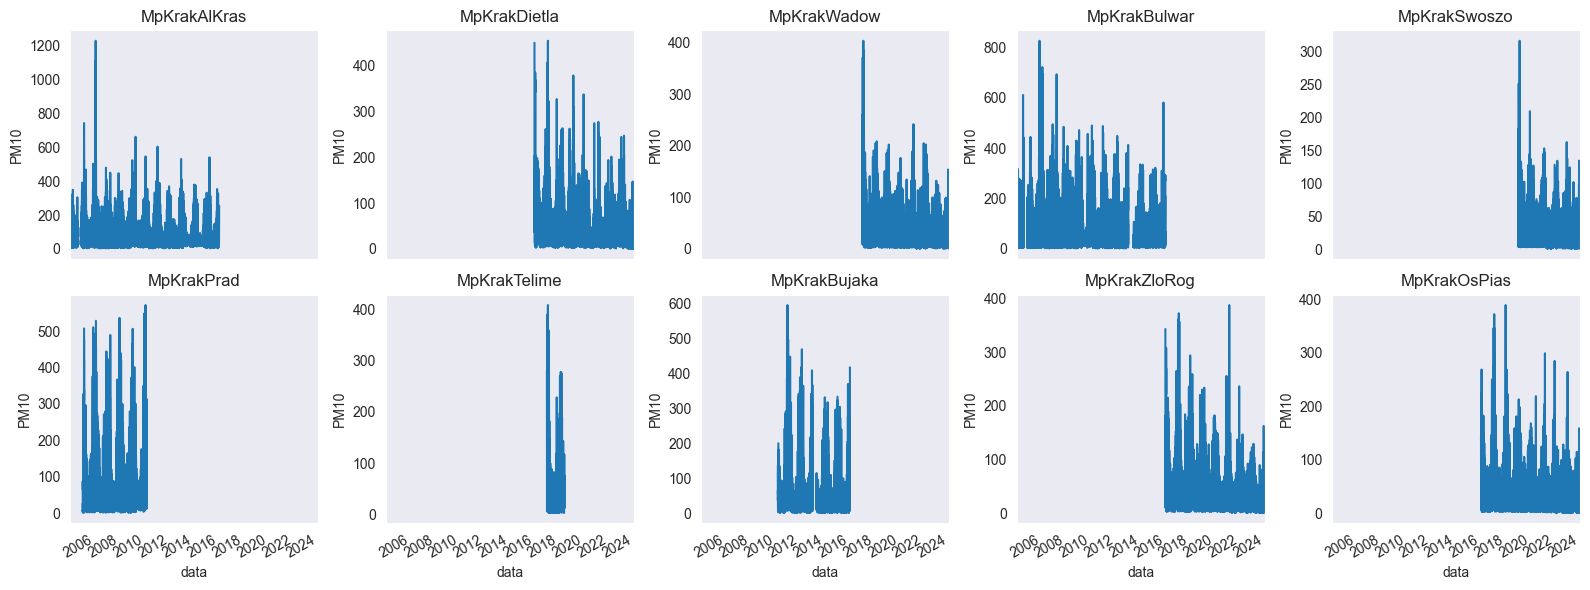

In [9]:
plotting_station(dfPM10, 2, 5, 'PM10') 

In [10]:
stations_comparison(dfPM10)
# high differences

,col1,col2,mean,mean_abs,rms,max_diff,count
0,MpKrakAlKras,MpKrakBulwar,19.220016,26.626626,40.186961,763.0000,84514
1,MpKrakAlKras,MpKrakPrad,29.429494,34.361350,50.117485,843.0000,38536
2,MpKrakAlKras,MpKrakBujaka,18.751857,23.001756,34.129989,450.6968,44355
3,MpKrakDietla,MpKrakWadow,5.977361,11.412381,18.405089,279.0516,59176
4,MpKrakDietla,MpKrakSwoszo,4.756122,10.574272,16.567092,287.7360,41567
5,MpKrakDietla,MpKrakTelime,8.031775,14.344419,22.845727,245.1866,12100
6,MpKrakDietla,MpKrakZloRog,2.454113,9.783714,15.509251,245.4968,67161
7,MpKrakDietla,MpKrakOsPias,5.457730,11.039267,17.620477,343.5335,65585
8,MpKrakWadow,MpKrakSwoszo,0.791730,8.597664,13.554411,242.1813,42065
9,MpKrakWadow,MpKrakTelime,-3.867499,12.492235,21.596324,251.6454,11781


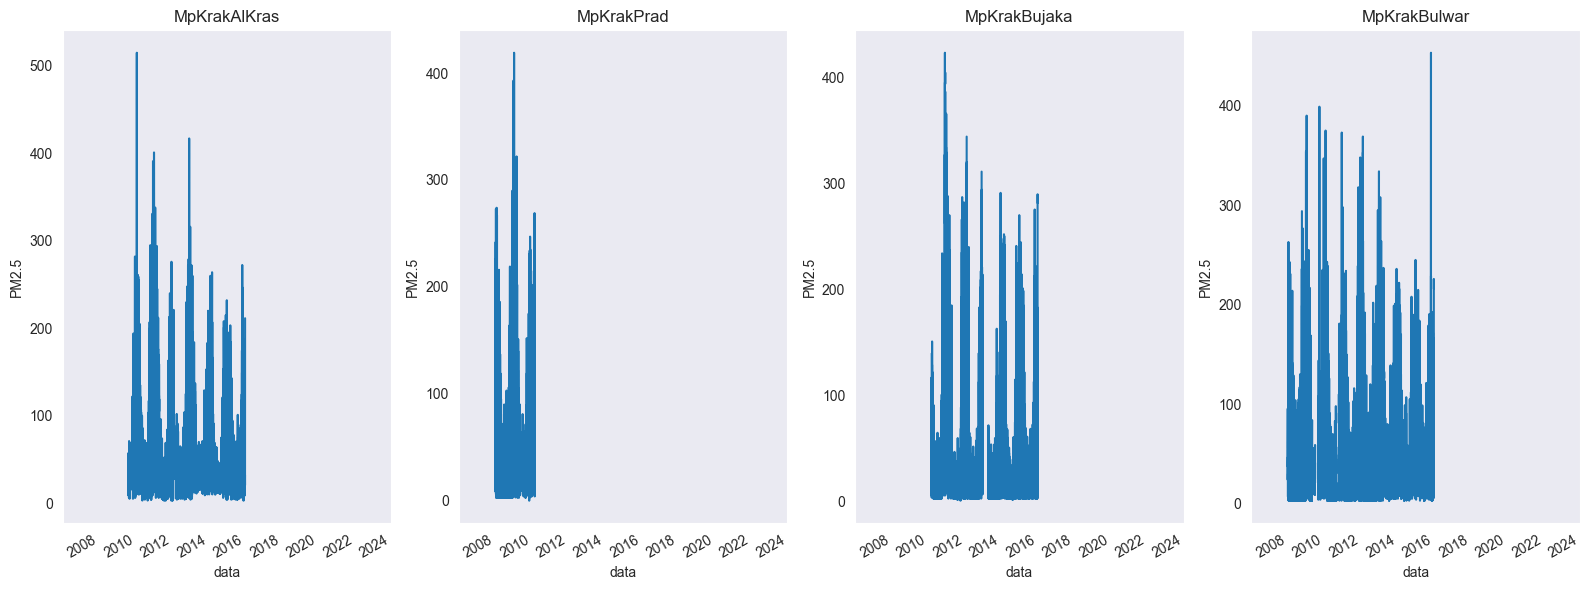

In [11]:
plotting_station(dfPM25, 1, 4, 'PM2.5')

In [12]:
stations_comparison(dfPM25)

,col1,col2,mean,mean_abs,rms,max_diff,count
0,MpKrakAlKras,MpKrakPrad,15.587245,21.737821,29.670277,155.000,3387
1,MpKrakAlKras,MpKrakBujaka,14.053419,16.636776,24.033369,282.000,44169
2,MpKrakAlKras,MpKrakBulwar,12.936544,16.161983,24.154487,341.000,45911
3,MpKrakPrad,MpKrakBulwar,-2.405856,11.074604,21.013253,360.000,16018
4,MpKrakBujaka,MpKrakBulwar,-1.383139,10.847896,19.583150,372.622,41170


In [13]:
weather = pd.read_csv('weather/1h/weather_filled.csv', index_col=0, parse_dates=True)
weather

,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindDirection,WindSpeed,AirPressure
2016-01-01 00:00:00,-8.871667,0.000000,0.00,1.7,70.875000,280.0,0.771667,1000.903333
2016-01-01 01:00:00,-9.153333,0.000000,0.00,1.1,71.593333,265.0,0.703333,1000.516667
2016-01-01 02:00:00,-9.475000,0.000000,0.00,1.4,71.685000,269.0,0.698333,1000.363333
2016-01-01 03:00:00,-9.851667,0.000000,0.00,1.6,71.863333,283.0,0.743333,1000.123333
2016-01-01 04:00:00,-10.175000,0.000000,0.00,1.4,71.668333,286.0,0.661667,1000.190000
...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,4.635000,0.000000,0.00,1.6,74.210000,77.0,0.866667,980.588333
2023-12-31 20:00:00,4.368333,0.000000,0.00,1.4,74.971667,21.0,0.721667,980.480000
2023-12-31 21:00:00,3.943333,0.000000,0.00,1.2,76.206667,339.0,0.546667,980.611667
2023-12-31 22:00:00,3.903333,0.000000,0.00,1.5,76.143333,329.0,0.585000,980.510000


In [14]:
weather.isnull().sum()

AirTemp             0
rainIntensity       0
rainAccumulation    0
maxWindSpeed        0
RelativeHumidity    0
WindDirection       0
WindSpeed           0
AirPressure         0
dtype: int64

In [15]:
dfPM10.loc['2016-01-01 00:00:00':, 'MpKrakZloRog'][dfPM10.loc['2016-01-01 00:00:00':, 'MpKrakZloRog'].isna()]

data
2016-01-01 00:00:43.790   NaN
2016-01-13 11:00:00.000   NaN
2016-01-13 12:00:00.000   NaN
2016-02-17 23:00:00.000   NaN
2016-02-19 12:00:00.000   NaN
                           ..
2023-12-08 18:00:00.000   NaN
2023-12-29 15:00:00.000   NaN
2023-12-29 16:00:00.000   NaN
2023-12-29 17:00:00.000   NaN
2023-12-29 18:00:00.000   NaN
Name: MpKrakZloRog, Length: 1561, dtype: float64

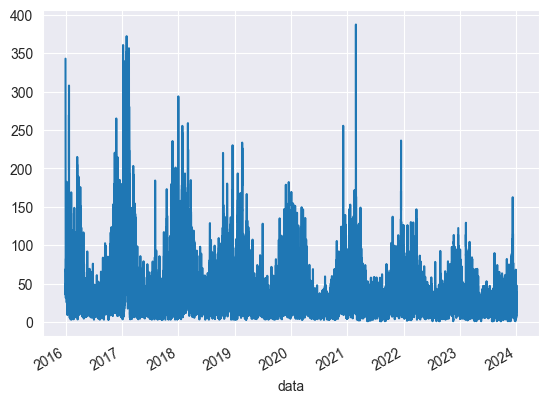

In [16]:
dfPM10.loc['2016-01-01 00:00:00':, 'MpKrakZloRog'].plot()
plt.show()

In [17]:
dfPM10.loc['2016-01-01 00:00:00':, 'MpKrakZloRog'] = dfPM10.loc['2016-01-01 00:00:00':, 'MpKrakZloRog'].interpolate(method='time')

In [18]:
data = pd.concat([dfPM10.loc['2016-01-01 01:00:00':, 'MpKrakZloRog'], weather], axis=1)

In [19]:
data[data.isnull().any(axis=1)]

,MpKrakZloRog,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindDirection,WindSpeed,AirPressure
2016-01-01,NaN,-8.871667,0.0,0.0,1.7,70.875,280.0,0.771667,1000.903333
2024-01-01,36.2436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data = data.dropna()

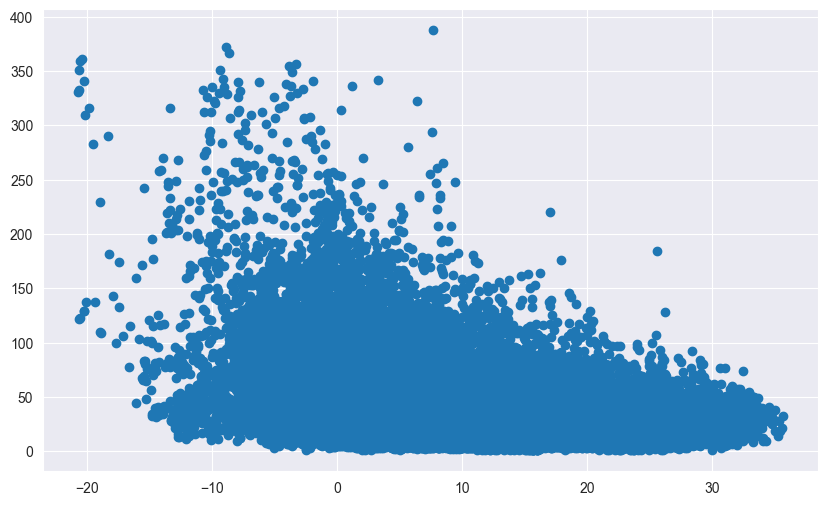

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['AirTemp'], data['MpKrakZloRog'])
plt.show()

In [22]:
# extreme temperature =/= extreme pollution
# depens on the day of the week, holidays

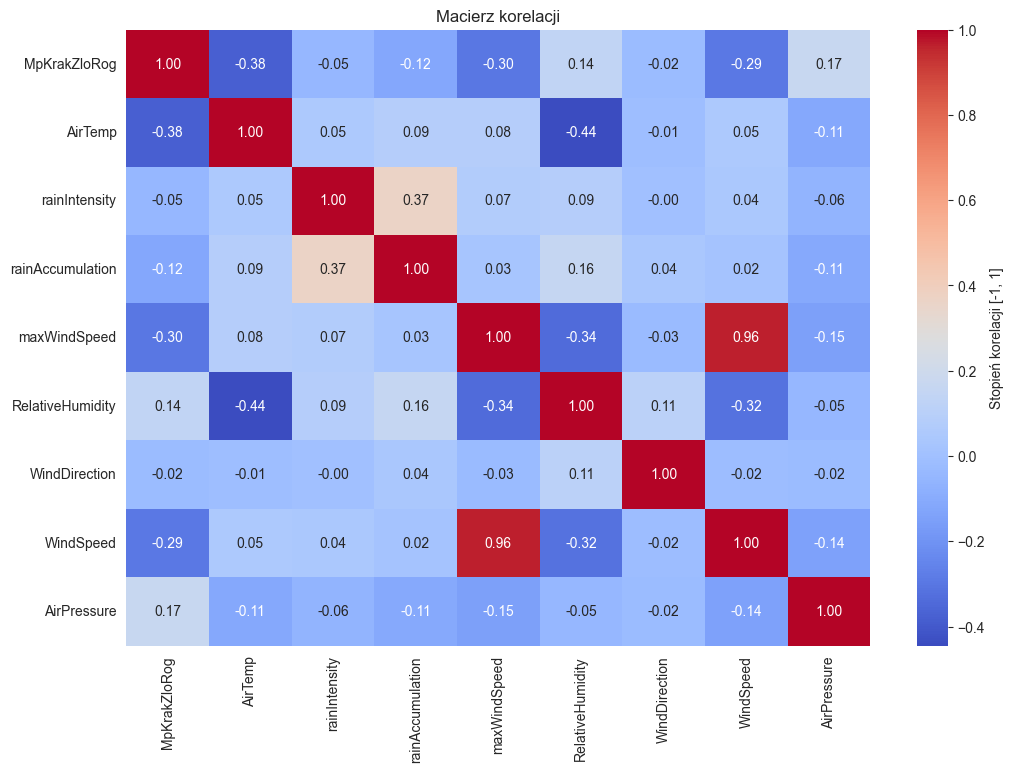

In [23]:
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Stopień korelacji [-1, 1]'})

plt.title('Macierz korelacji')
plt.show()

# stronger correlation then data/day

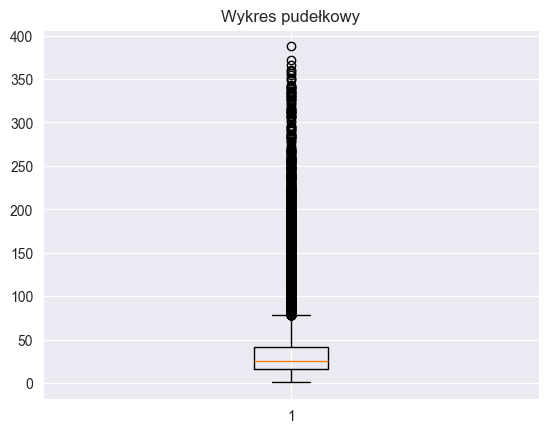

In [24]:
plt.boxplot(data.MpKrakZloRog)
plt.title('Wykres pudełkowy')
plt.show()

In [25]:
Q1 = data.MpKrakZloRog.quantile(0.25)
Q3 = data.MpKrakZloRog.quantile(0.75)
IQR = Q3 - Q1
(data.MpKrakZloRog > Q3 + 1.5 * IQR).sum()
# much more extreme values in hourly data

np.int64(5162)

In [26]:
outliers = data.MpKrakZloRog[(data.MpKrakZloRog > Q3 + 1.5 * IQR)]
outliers = outliers.sort_values(ascending=False)
outliers

2021-02-24 19:00:00    387.3930
2017-01-31 03:00:00    372.2260
2017-01-31 02:00:00    366.0570
2017-01-08 02:00:00    360.6860
2017-01-08 03:00:00    358.8400
                         ...   
2021-03-10 08:00:00     78.9264
2017-11-28 10:00:00     78.9232
2016-11-04 22:00:00     78.9090
2020-01-16 16:00:00     78.9068
2017-03-21 05:00:00     78.9034
Name: MpKrakZloRog, Length: 5162, dtype: float64

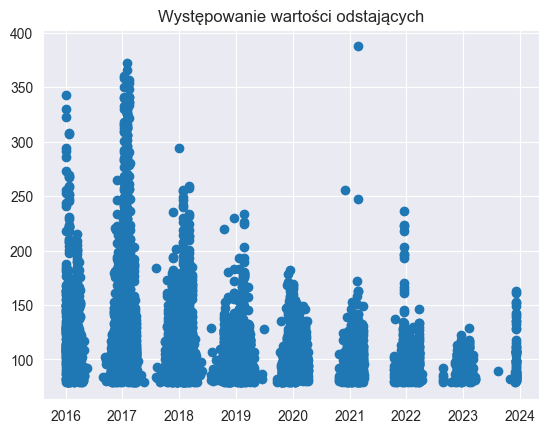

In [27]:
plt.scatter(x=outliers.index, y=outliers.values)
plt.title('Występowanie wartości odstających')
plt.show()
# probably not error, just extreme values

In [28]:
#outliers.index[0]
data.loc['2021', 'MpKrakZloRog'].sort_values(ascending=False)

2021-02-24 19:00:00    387.39300
2021-02-24 18:00:00    247.72700
2021-12-14 08:00:00    236.24000
2021-12-14 07:00:00    223.82200
2021-12-14 06:00:00    222.68400
                         ...    
2021-05-09 14:00:00      1.00000
2021-08-05 18:00:00      1.00000
2021-08-31 13:00:00      1.00000
2021-08-05 22:00:00      0.95871
2021-05-09 15:00:00      0.91438
Name: MpKrakZloRog, Length: 8760, dtype: float64

In [29]:
data.loc[outliers.index[0], 'MpKrakZloRog'] = data.loc['2021', 'MpKrakZloRog'].sort_values(ascending=False).iloc[1]

## Date features

In [30]:
data['month'] = data.index.month
data['day_of_week'] = data.index.dayofweek + 1    # index starts at 0 
data['day'] = data.index.day 
data['year'] = data.index.year

In [31]:
day_off_idx = data.loc[(data['day_of_week'] == 6) | (data['day_of_week'] == 7)].index
data['day_off'] = 0
data.loc[day_off_idx, 'day_off'] = 1

In [32]:
holidays_dates = []
years = range(2016, 2024) 
for ptr in holidays.Poland(years = years).items(): 
    #print(ptr[0]) 
    holidays_dates.append(ptr[0])

In [33]:
data['date'] = data.index.date
data.loc[data['date'].isin(holidays_dates), 'day_off'] = 1

In [34]:
# sin-cos instead of one-hot encoding
# cyclical variable
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

In [35]:
data['hour'] = data.index.hour

In [36]:
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

In [37]:
# wind direction in degree 0-360 
data['sin_WindDir'] = np.sin(np.deg2rad(data.WindDirection))
data['cos_WindDir'] = np.cos(np.deg2rad(data.WindDirection))

In [38]:
data.isnull().sum()

MpKrakZloRog        0
AirTemp             0
rainIntensity       0
rainAccumulation    0
maxWindSpeed        0
RelativeHumidity    0
WindDirection       0
WindSpeed           0
AirPressure         0
month               0
day_of_week         0
day                 0
year                0
day_off             0
date                0
month_sin           0
month_cos           0
hour                0
hour_sin            0
hour_cos            0
sin_WindDir         0
cos_WindDir         0
dtype: int64

In [39]:
#data['lag_year'] = data['MpKrakZloRog'].shift(365)
#data['lag_1'] = data['MpKrakZloRog'].shift(1)
#data['lag_3'] = data['MpKrakZloRog'].shift(3)
#data['lag_24h'] = data['MpKrakZloRog'].shift(24) 

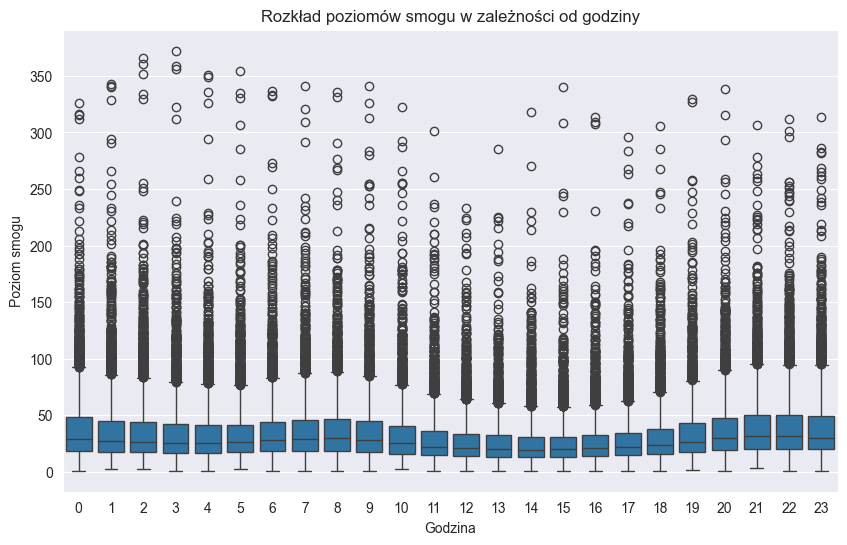

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='hour', y='MpKrakZloRog')

plt.title('Rozkład poziomów smogu w zależności od godziny')
plt.xlabel('Godzina')
plt.ylabel('Poziom smogu')

plt.show()

In [41]:
data = data.drop(['day', 'day_of_week', 'date', 'hour', 'month', 'WindDirection'], axis=1)

In [42]:
data.to_csv('preprocessed/data1h.csv')

### Features importance

In [51]:
data = pd.read_csv('preprocessed/data1h.csv', index_col=0, parse_dates=True)

In [52]:
data

,MpKrakZloRog,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindSpeed,AirPressure,year,day_off,month_sin,month_cos,hour_sin,hour_cos,sin_WindDir,cos_WindDir
2016-01-01 01:00:00,342.9240,-9.153333,0.000000,0.00,1.1,71.593333,0.703333,1000.516667,2016,1,5.000000e-01,0.866025,0.258819,0.965926,-0.996195,-0.087156
2016-01-01 02:00:00,329.6600,-9.475000,0.000000,0.00,1.4,71.685000,0.698333,1000.363333,2016,1,5.000000e-01,0.866025,0.500000,0.866025,-0.999848,-0.017452
2016-01-01 03:00:00,322.5390,-9.851667,0.000000,0.00,1.6,71.863333,0.743333,1000.123333,2016,1,5.000000e-01,0.866025,0.707107,0.707107,-0.974370,0.224951
2016-01-01 04:00:00,294.5480,-10.175000,0.000000,0.00,1.4,71.668333,0.661667,1000.190000,2016,1,5.000000e-01,0.866025,0.866025,0.500000,-0.961262,0.275637
2016-01-01 05:00:00,285.5270,-10.160000,0.000000,0.00,1.5,71.786667,0.600000,999.881667,2016,1,5.000000e-01,0.866025,0.965926,0.258819,-0.939693,-0.342020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,29.7133,4.635000,0.000000,0.00,1.6,74.210000,0.866667,980.588333,2023,1,-2.449294e-16,1.000000,-0.965926,0.258819,0.974370,0.224951
2023-12-31 20:00:00,32.3285,4.368333,0.000000,0.00,1.4,74.971667,0.721667,980.480000,2023,1,-2.449294e-16,1.000000,-0.866025,0.500000,0.358368,0.933580
2023-12-31 21:00:00,38.2589,3.943333,0.000000,0.00,1.2,76.206667,0.546667,980.611667,2023,1,-2.449294e-16,1.000000,-0.707107,0.707107,-0.358368,0.933580
2023-12-31 22:00:00,41.0132,3.903333,0.000000,0.00,1.5,76.143333,0.585000,980.510000,2023,1,-2.449294e-16,1.000000,-0.500000,0.866025,-0.515038,0.857167


In [53]:
X_train = data.iloc[:60000, 1:]
y_train = data.iloc[:60000, 0]
X_test = data.iloc[60000:, 1:]
y_test = data.iloc[60000:, 0]

In [54]:
from sklearn.preprocessing import StandardScaler

# standarization
# not all variables
cols_to_scale = ['AirTemp', 'rainIntensity', 'rainAccumulation', 'maxWindSpeed', 'RelativeHumidity', 
                 'WindSpeed', 'AirPressure', 'year']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
scaler = StandardScaler()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

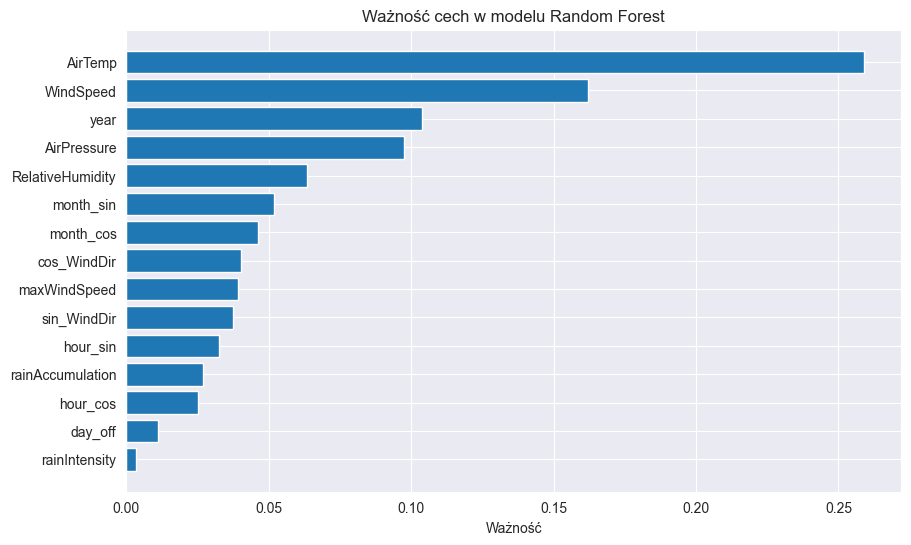

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=44)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_

indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title("Ważność cech w modelu Random Forest")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel("Ważność")
plt.show()

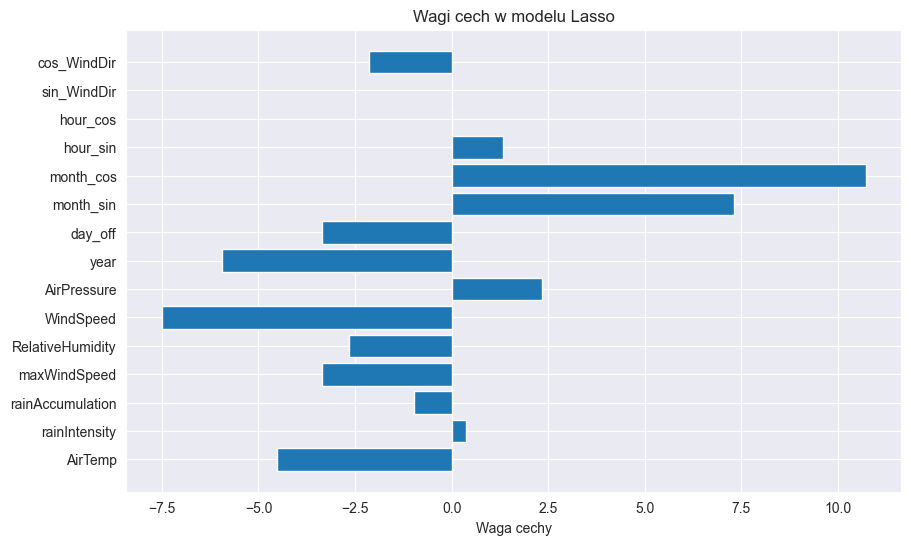

In [56]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.3) 

lasso.fit(X_train_scaled, y_train)

lasso_coef = lasso.coef_

plt.figure(figsize=(10, 6))
plt.title("Wagi cech w modelu Lasso")
plt.barh(X_train.columns, lasso_coef)
plt.xlabel("Waga cechy")
plt.show()